In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = pd.read_csv("/home/techfield/class/Presentations/USPS/usps_digit_recognizer.csv")

In [3]:
digits.shape

(42000, 785)

In [4]:
D = 785
K = 10

In [5]:
#Training set
seed = 10
train1=digits.sample(frac=.6,random_state = seed)
training_target = train1.label.values
train= train1.drop("label",axis=1)
cols = train.columns
train['> zero'] = train[cols].gt(0).sum(axis=1)
trainmax= train.max(1)
train = train / trainmax[:,None]


#Validate set
validate_test = digits.loc[~digits.index.isin(train1.index)]

validate_origin = validate_test.sample(frac=.5,random_state = seed )
validate1 = validate_origin.drop("label",axis=1)
validate_target = validate_origin.label.values
validate = validate1
cols = validate.columns
validate['> zero'] = validate[cols].gt(0).sum(axis=1)
valmax= validate.max(1)
validate = validate / valmax[:,None]

#Test set
test = validate_test.loc[~validate_test.index.isin(validate_origin.index)]
test_no_y = test.drop("label",axis=1)
test_target = test.label.values
test = test_no_y
cols = test.columns
test['> zero'] = test[cols].gt(0).sum(axis=1)
testmax= test.max(1)
test = test / testmax[:,None]

In [14]:
test_target.shape

(8400,)

In [15]:
validate.shape

(8400, 785)

In [16]:
test.shape

(8400, 785)

In [17]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
      #  try:
        Y[i,y[i]] = 1
       # except:
         #   pdb.set_trace()
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y,P_hat):
    return np.mean(y == P_hat.argmax(axis =1))

def confusion_matrix(Y, Y_hat):
    return np.matmul(Y.T, Y_hat)
    

In [18]:
PHI = np.column_stack((np.ones((25200,1)), train))
Y = one_hot_encode(training_target)

In [19]:
PHI.shape

(25200, 786)

In [20]:
Y.shape

(25200, 10)

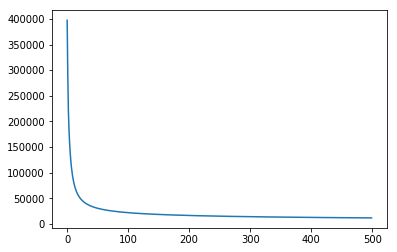

In [21]:
W = np.random.randn(D+1,K)

eta = 5e-5
epochs = int(5e3)
J = np.zeros(epochs)

for epoch in range(epochs):
    P_hat = softmax(PHI.dot(W))
    J[epoch] = cross_entropy(Y,P_hat)
    W -= eta*PHI.T.dot(P_hat - Y)
    
plt.figure()
plt.plot(J)

In [23]:
#Accuracy for training set
print("Accuracy: {:0.4f}".format(accuracy(training_target,P_hat)))

Accuracy: 0.8908


In [24]:
P_hat.shape

(25200, 10)

In [25]:
validate = np.column_stack((np.ones((8400,1)), validate))
p_hat = validate.dot(W)
print("Accuracy: {:0.4f}".format(accuracy(validate_target,p_hat)))

Accuracy: 0.8686


In [26]:
test = np.column_stack((np.ones((8400,1)), test))
p_hat = test.dot(W)
print("Accuracy: {:0.4f}".format(accuracy(test_target,p_hat)))

Accuracy: 0.8768


In [ ]:
p_hat =  np.argmax(p_hat, axis=1)

In [ ]:
y_actu.shape

In [ ]:
y_pred.shape

In [ ]:


y_actu = pd.Series(test_target, name='Actual')
y_pred = pd.Series(p_hat, name='Predicted')
thresh = .5
y_hat = (p_hat > thresh).astype(np.int32)
y_actu = pd.Series(test_target, name='Actual')
y_pred = pd.Series(p_hat, name='Predicted')
Y = one_hot_encode(y_actu)
Y_hat = one_hot_encode(y_pred)
confus = confusion_matrix(Y, Y_hat)

In [ ]:
confus